In [120]:
import matplotlib.pyplot as plt
import numpy as np
import qiskit.providers.fake_provider as fp
from qiskit import QuantumCircuit, transpile
from qiskit.primitives import Sampler
from qiskit.visualization import circuit_drawer, plot_gate_map
from qiskit_algorithms import EstimationProblem, AmplitudeEstimation

# QAE 돌리기

## A & Q 정의

In [121]:
class BernoulliA(QuantumCircuit):
    """A circuit representing the Bernoulli A operator."""

    def __init__(self, probability):
        super().__init__(1)  # circuit on 1 qubit

        theta_p = 2 * np.arcsin(np.sqrt(probability))
        self.ry(theta_p, 0)

In [122]:
class BernoulliQ(QuantumCircuit):
    """A circuit representing the Bernoulli Q operator."""

    def __init__(self, probability):
        super().__init__(1)  # circuit on 1 qubit

        self._theta_p = 2 * np.arcsin(np.sqrt(probability))
        self.ry(2 * self._theta_p, 0)

    def power(self, k):
        # implement the efficient power of Q
        q_k = QuantumCircuit(1)
        q_k.ry(2 * k * self._theta_p, 0)
        return q_k

In [123]:
p = 0.34

In [124]:
A = BernoulliA(p)
Q = BernoulliQ(p)

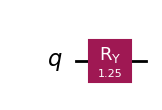

In [125]:
A.draw(output='mpl', style="iqp")

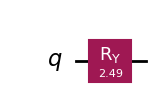

In [126]:
Q.draw(output='mpl', style="iqp")

## 전체 Circuit 만들기

In [127]:
problem = EstimationProblem(state_preparation=A,
                            grover_operator=Q,
                            objective_qubits=[0])

In [128]:
ae = AmplitudeEstimation(num_eval_qubits=4, sampler=Sampler())

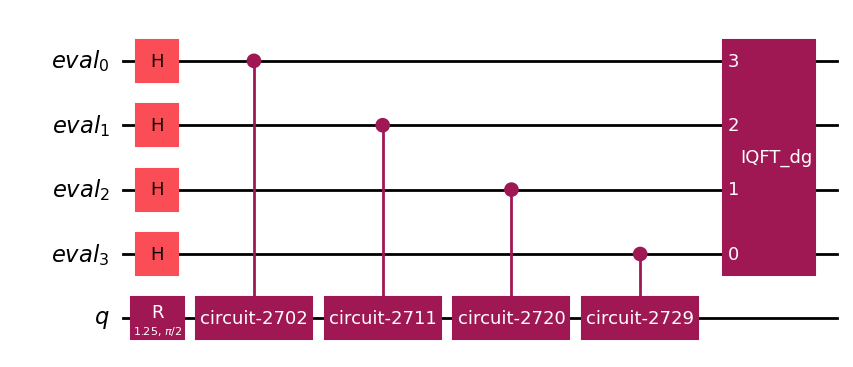

In [129]:
ae.construct_circuit(problem).decompose(reps=1).draw(output='mpl', style="iqp")

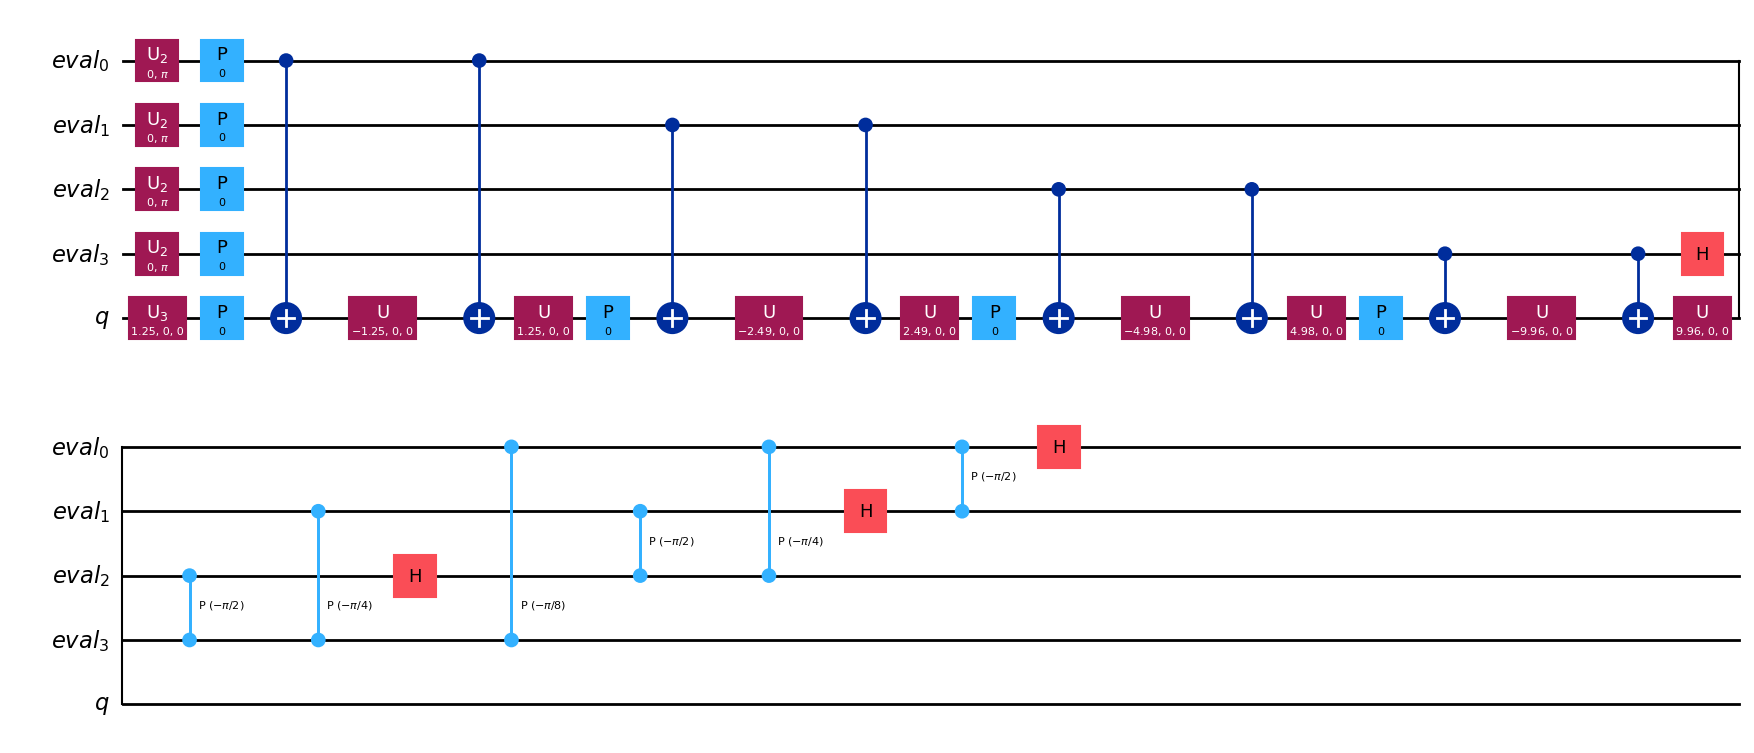

In [130]:
ae.construct_circuit(problem).decompose(reps=2).draw(output='mpl', style="iqp")

## 돌리고 결과 보기

In [131]:
ae_result = ae.estimate(problem)
print(f"True T-Bill: {p}, Estimated Value: {ae_result.estimation}")

True T-Bill: 0.34, Estimated Value: 0.3086583


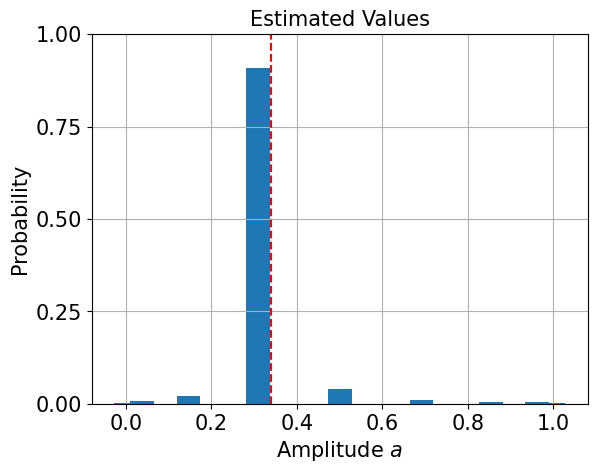

In [132]:
gridpoints = list(ae_result.samples.keys())
probabilities = list(ae_result.samples.values())

plt.bar(gridpoints, probabilities, width=0.5 / len(probabilities))
plt.axvline(p, color="r", ls="--")
plt.xticks(size=15)
plt.yticks([0, 0.25, 0.5, 0.75, 1], size=15)
plt.title("Estimated Values", size=15)
plt.ylabel("Probability", size=15)
plt.xlabel(r"Amplitude $a$", size=15)
plt.ylim((0, 1))
plt.grid()
plt.show()

# CX 게이트 수

#### Fake Processor list & toplogies

In [133]:
# FakeTokyo, FakeGuadalupe, FakeYorktown, FakeWashington: Ref
# FakeSherbrooke, FakeCairo, FakeHanoi, FakeKolkata, FakeMumbai: 현재 운용중
backend = fp.FakeYorktown()

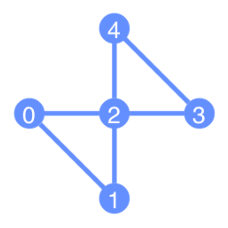

In [134]:
plot_gate_map(backend)

In [135]:
print(f'Num of qubit is : {backend.configuration().n_qubits}')

Num of qubit is : 5


## Yorktown 실험

### 4개 qubits(3개 evaluation qubits)

In [136]:
backend = fp.FakeYorktown()

In [137]:
ae = AmplitudeEstimation(num_eval_qubits=3, sampler=Sampler())

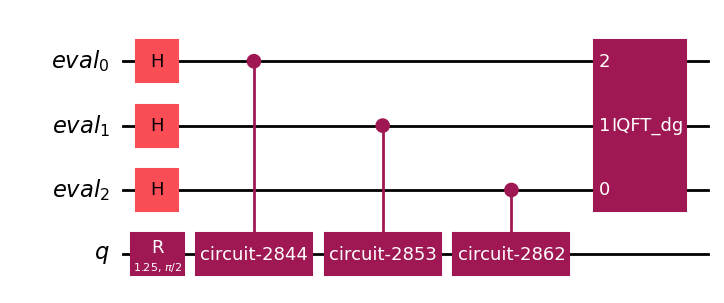

In [138]:
ae.construct_circuit(problem).decompose(reps=1).draw(output='mpl', style="iqp")

#### Backend 없이(이상적)

In [139]:
transpile(ae.construct_circuit(problem).decompose(reps=8)).count_ops()['cx']

12

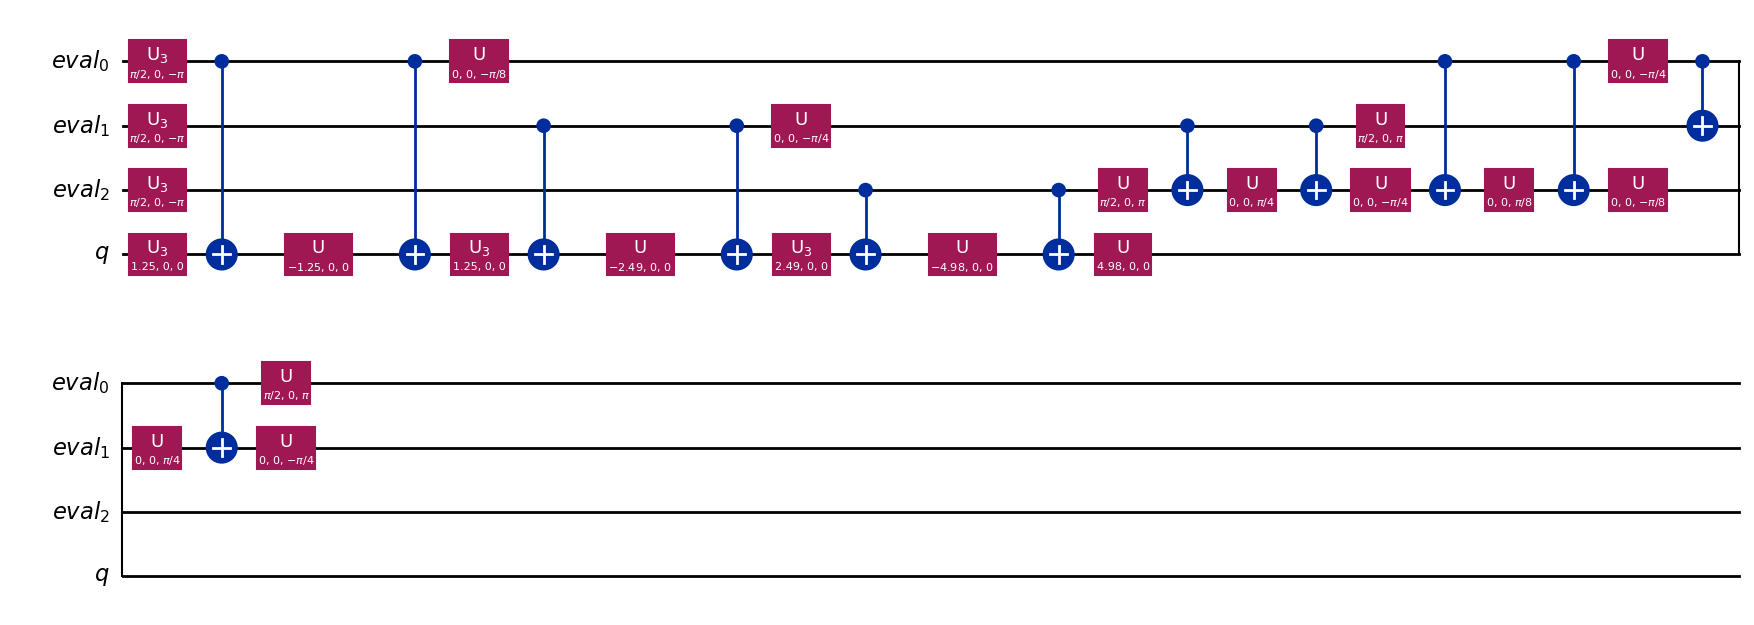

In [140]:
transpile(ae.construct_circuit(problem).decompose(reps=8)).draw(output='mpl', style="iqp")

#### Backend 있지(실제)

In [141]:
transpile(ae.construct_circuit(problem).decompose(reps=8), backend=backend).count_ops()['cx']

15

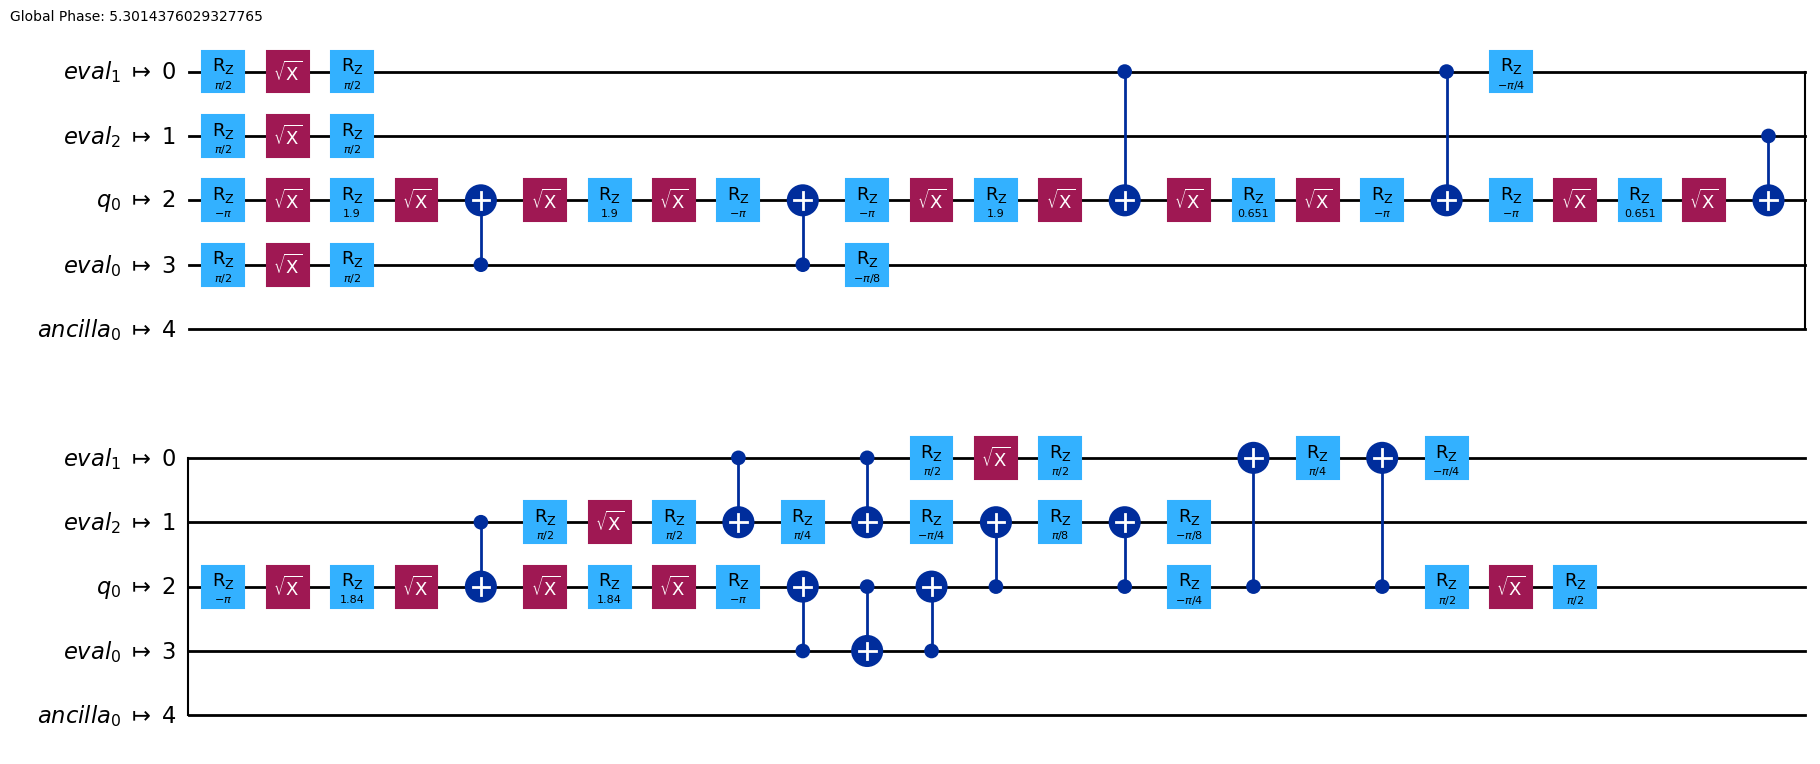

In [142]:
circuit_drawer(transpile(ae.construct_circuit(problem).decompose(reps=8), backend=backend), output='mpl', style="iqp")

### 5개 qubits(4개 evaluation qubits)

In [143]:
ae = AmplitudeEstimation(num_eval_qubits=4, sampler=Sampler())

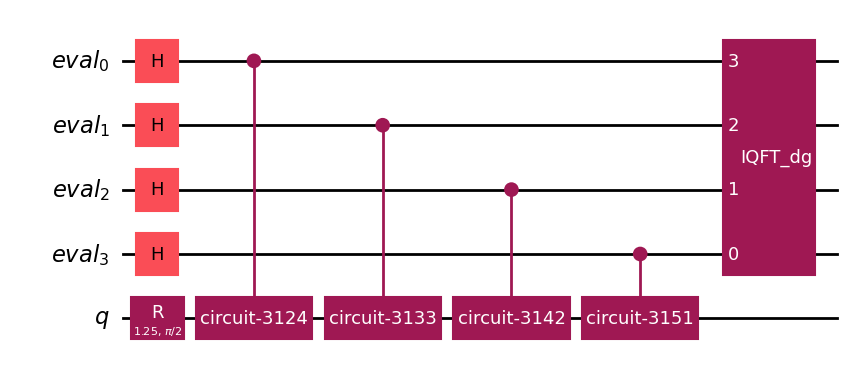

In [144]:
ae.construct_circuit(problem).decompose(reps=1).draw(output='mpl', style="iqp")

#### Backend 없이(이상적)

In [145]:
transpile(ae.construct_circuit(problem).decompose(reps=8)).count_ops()['cx']

20

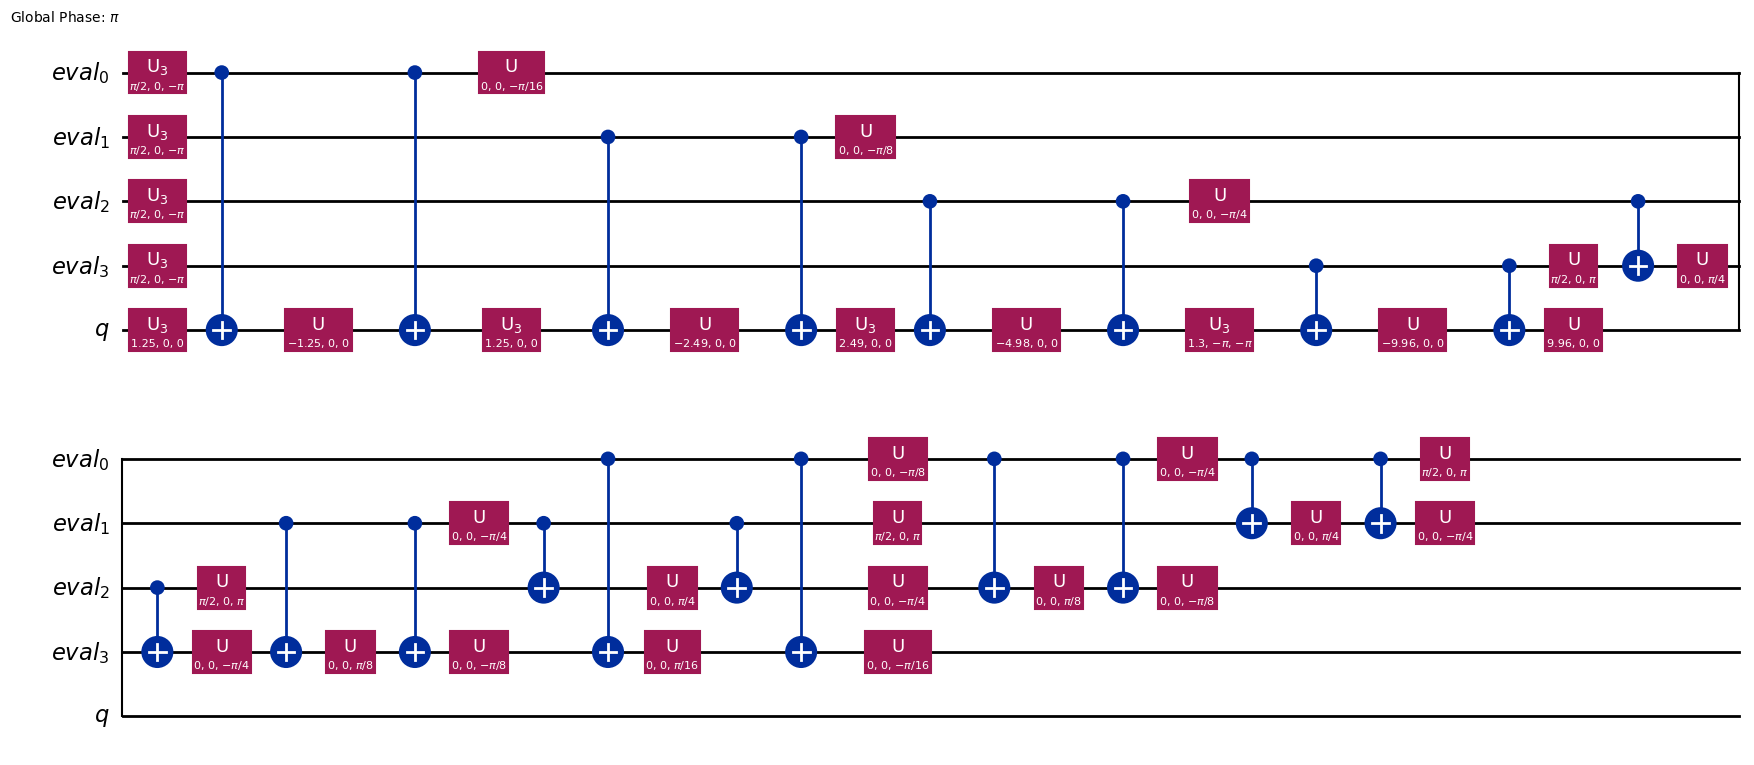

In [146]:
transpile(ae.construct_circuit(problem).decompose(reps=8)).draw(output='mpl', style="iqp")

#### Backend 있지(실제)

In [147]:
transpile(ae.construct_circuit(problem).decompose(reps=8), backend=backend).count_ops()['cx']

26

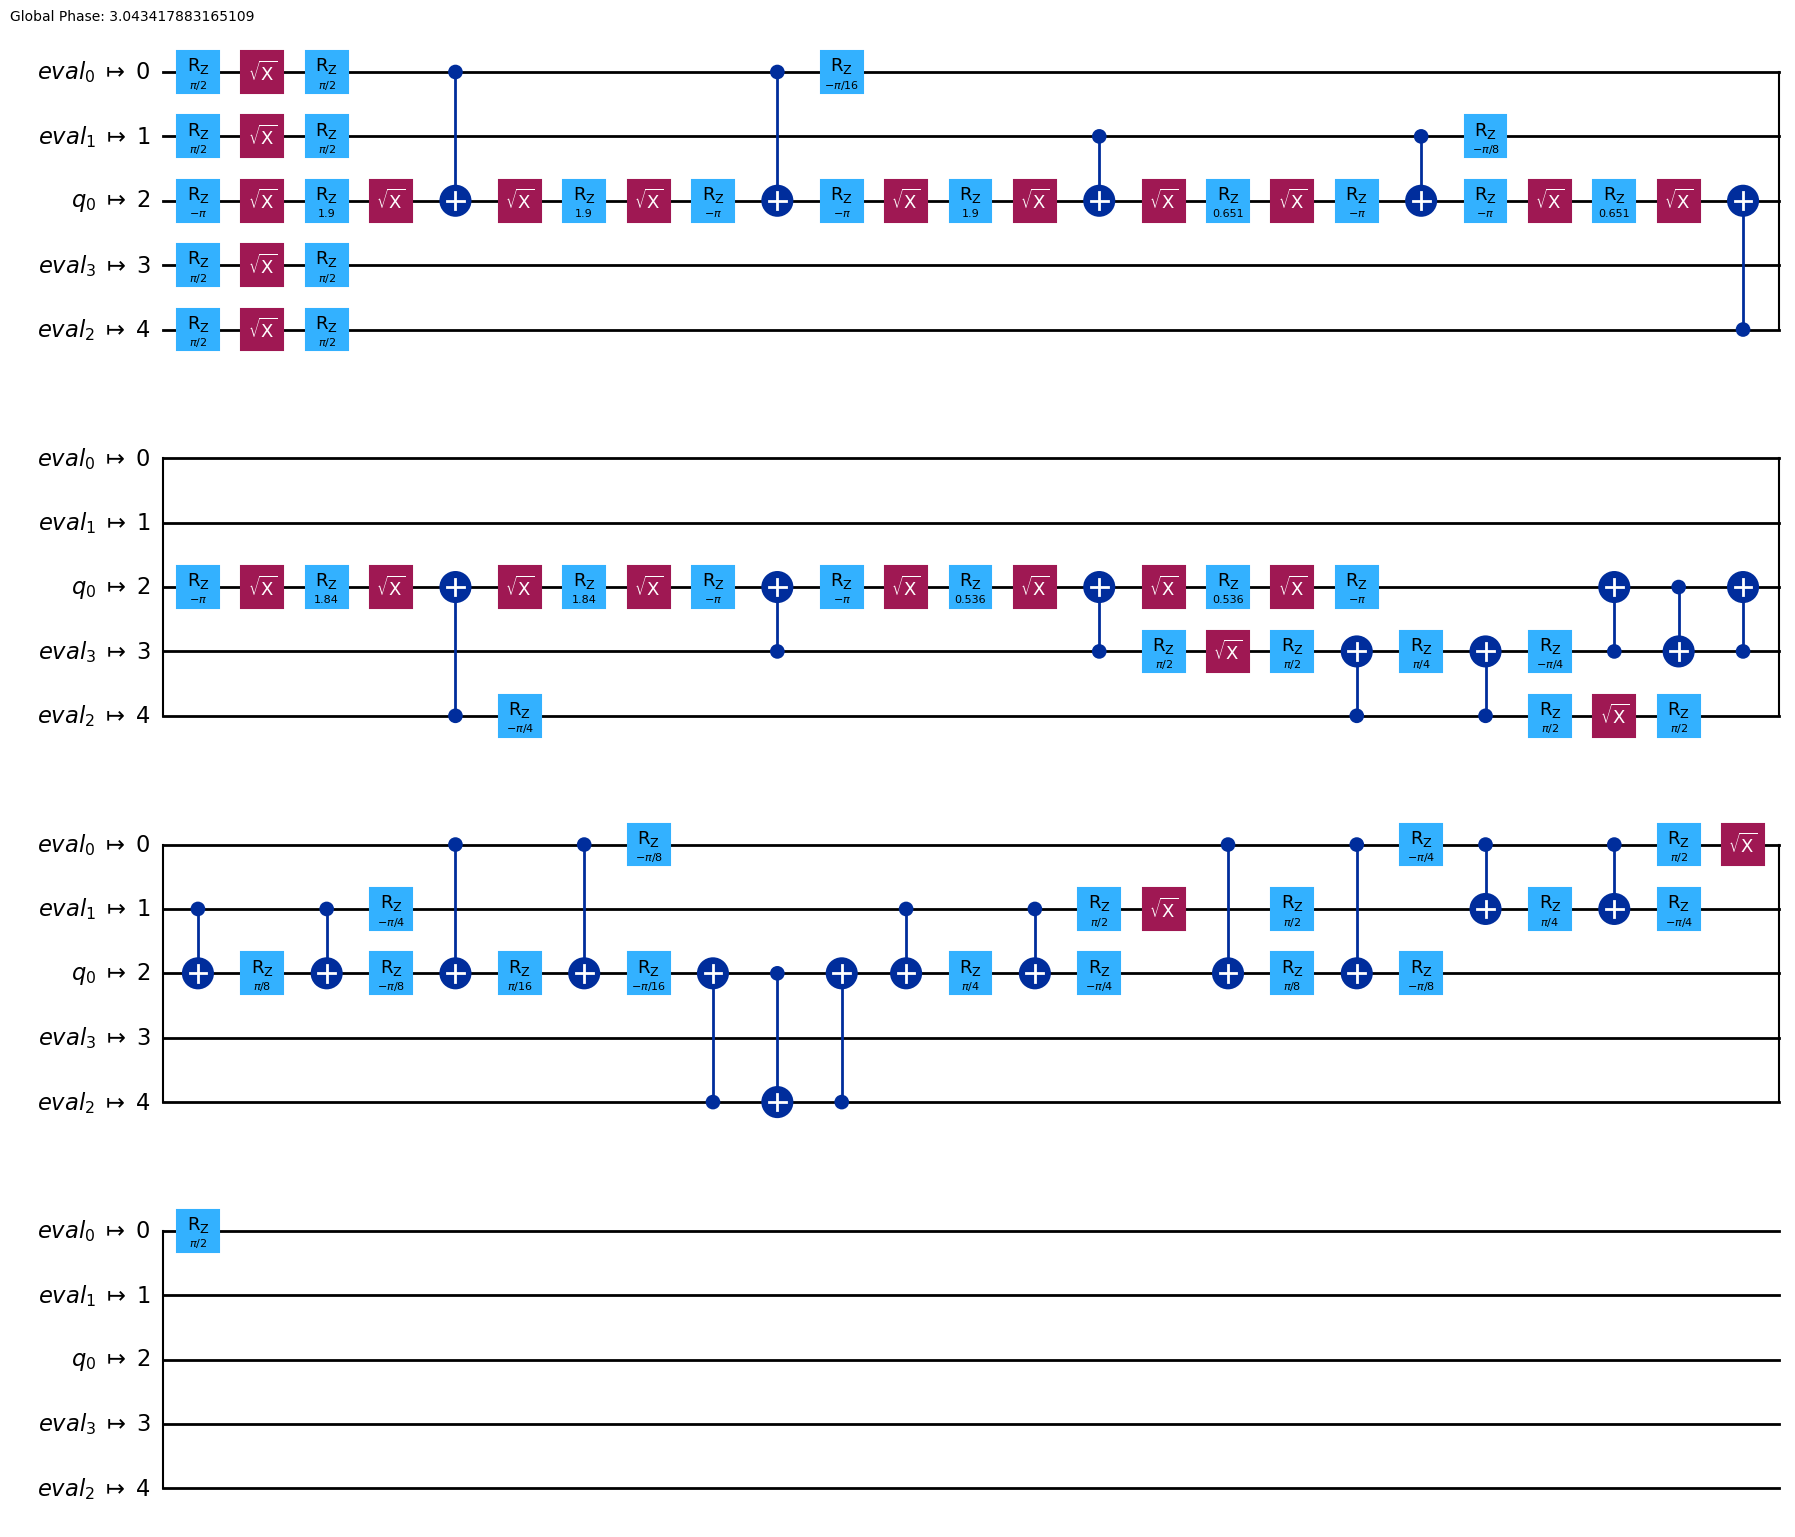

In [148]:
circuit_drawer(transpile(ae.construct_circuit(problem).decompose(reps=8), backend=backend), output='mpl', style="iqp")

## Tokyo 실험

### 4개 qubits(3개 evaluation qubits)

In [149]:
backend = fp.FakeTokyo()

In [150]:
ae = AmplitudeEstimation(num_eval_qubits=3, sampler=Sampler())

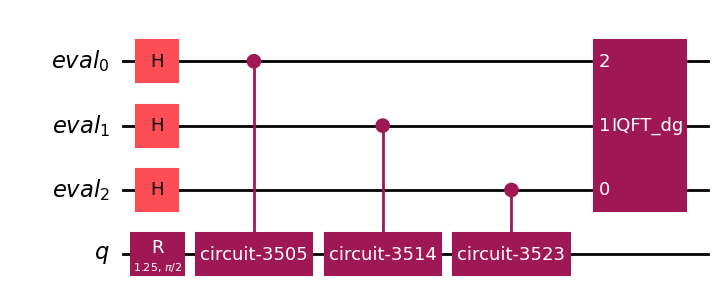

In [151]:
ae.construct_circuit(problem).decompose(reps=1).draw(output='mpl', style="iqp")

#### Backend 없이(이상적)

In [152]:
transpile(ae.construct_circuit(problem).decompose(reps=8)).count_ops()['cx']

12

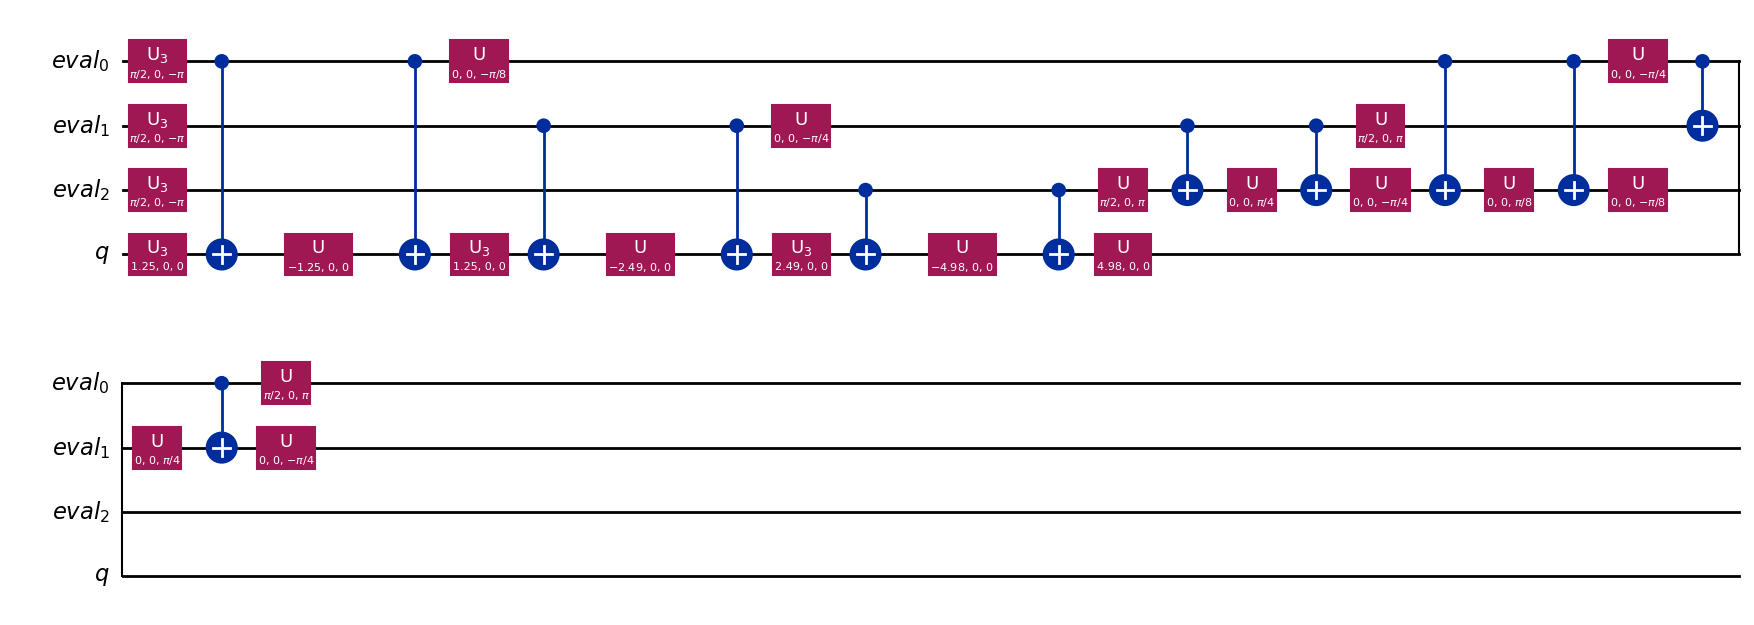

In [153]:
transpile(ae.construct_circuit(problem).decompose(reps=8)).draw(output='mpl', style="iqp")

#### Backend 있지(실제)

In [154]:
transpile(ae.construct_circuit(problem).decompose(reps=8), backend=backend).count_ops()['cx']

12

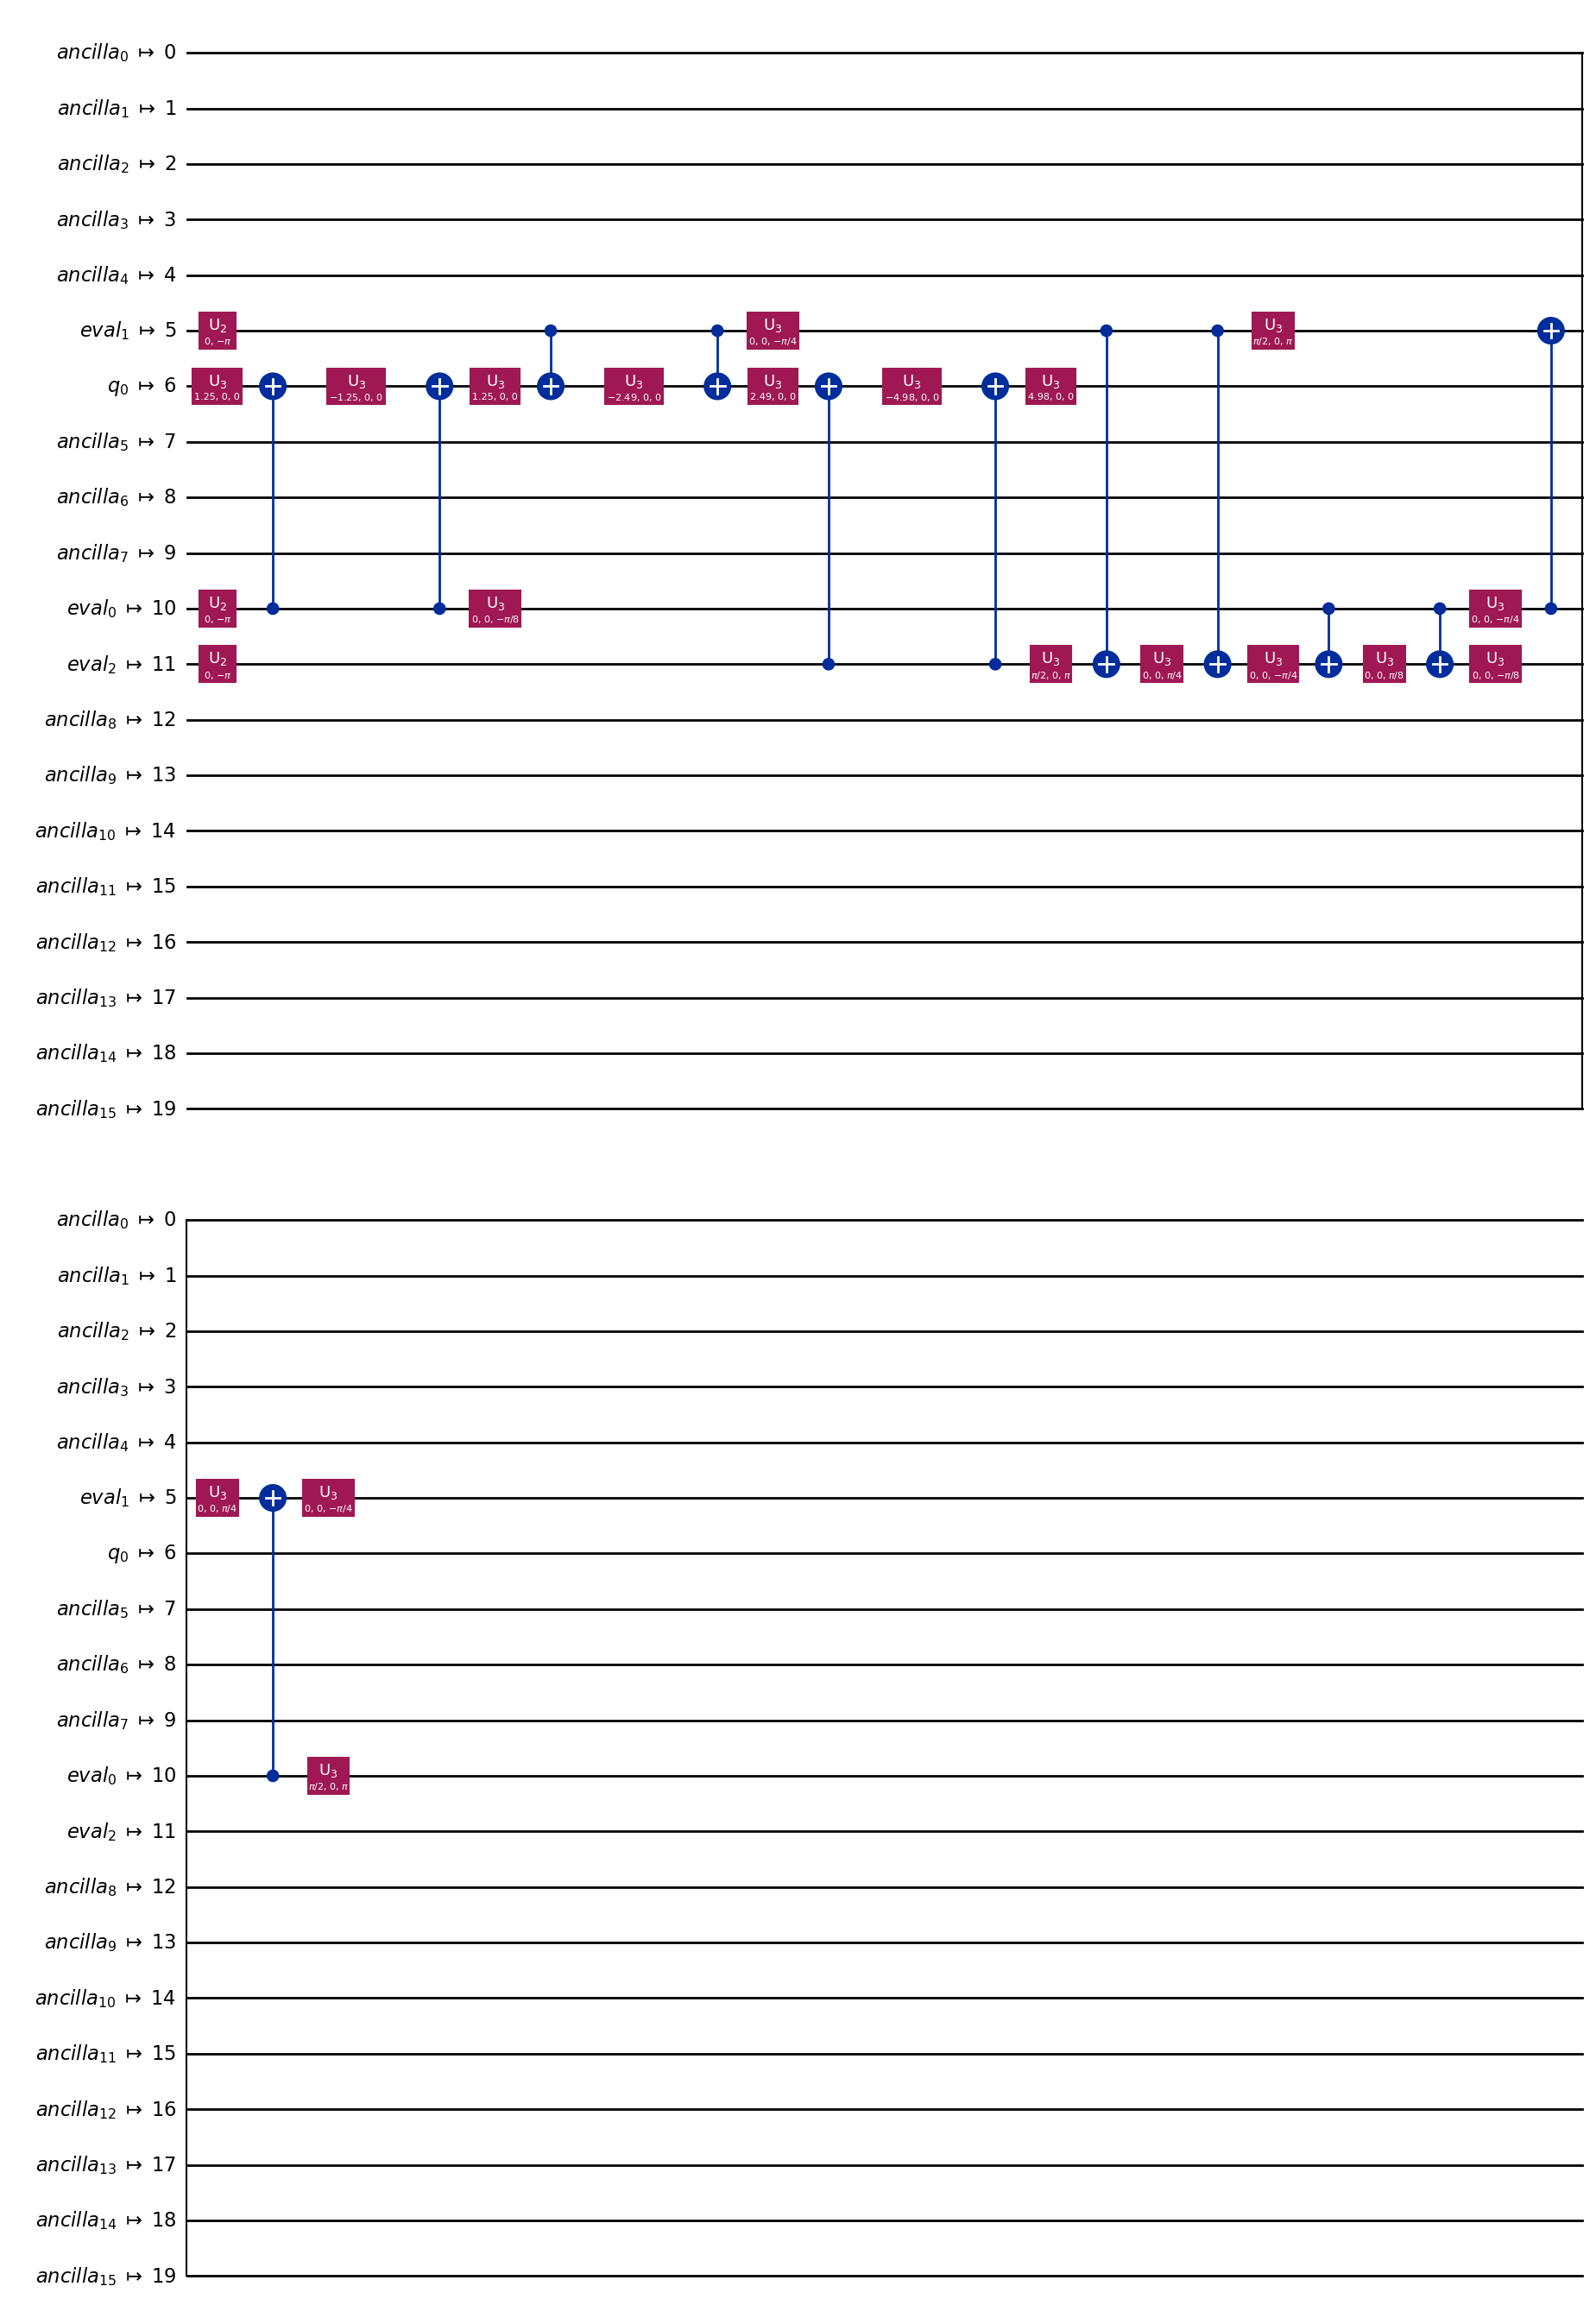

In [155]:
circuit_drawer(transpile(ae.construct_circuit(problem).decompose(reps=8), backend=backend), output='mpl', style="iqp")

### 5개 qubits(4개 evaluation qubits)

In [156]:
ae = AmplitudeEstimation(num_eval_qubits=4, sampler=Sampler())

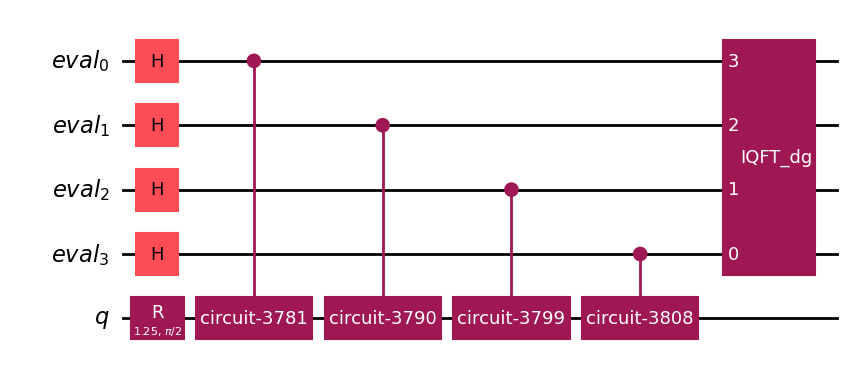

In [157]:
ae.construct_circuit(problem).decompose(reps=1).draw(output='mpl', style="iqp")

#### Backend 없이(이상적)

In [158]:
transpile(ae.construct_circuit(problem).decompose(reps=8)).count_ops()['cx']

20

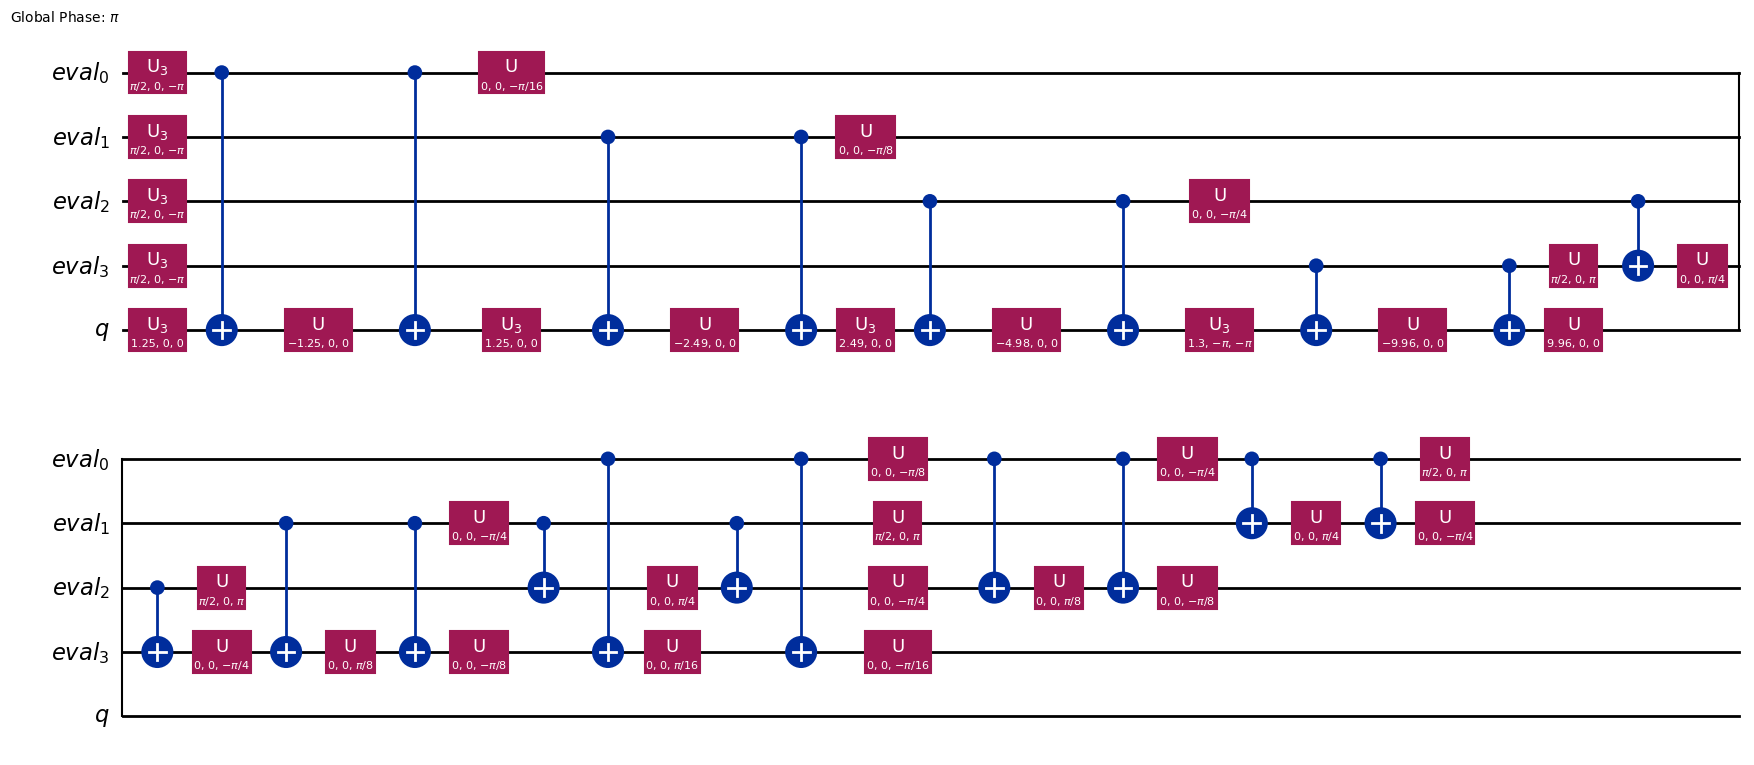

In [159]:
transpile(ae.construct_circuit(problem).decompose(reps=8)).draw(output='mpl', style="iqp")

#### Backend 있지(실제)

이거 이론상 23개 나와야 최소인데, 보통 26개 나옴(보통 고르면 26개 나오게 고름), 계속 해봐야함

In [160]:
transpile(ae.construct_circuit(problem).decompose(reps=8), backend=backend).count_ops()['cx']

23

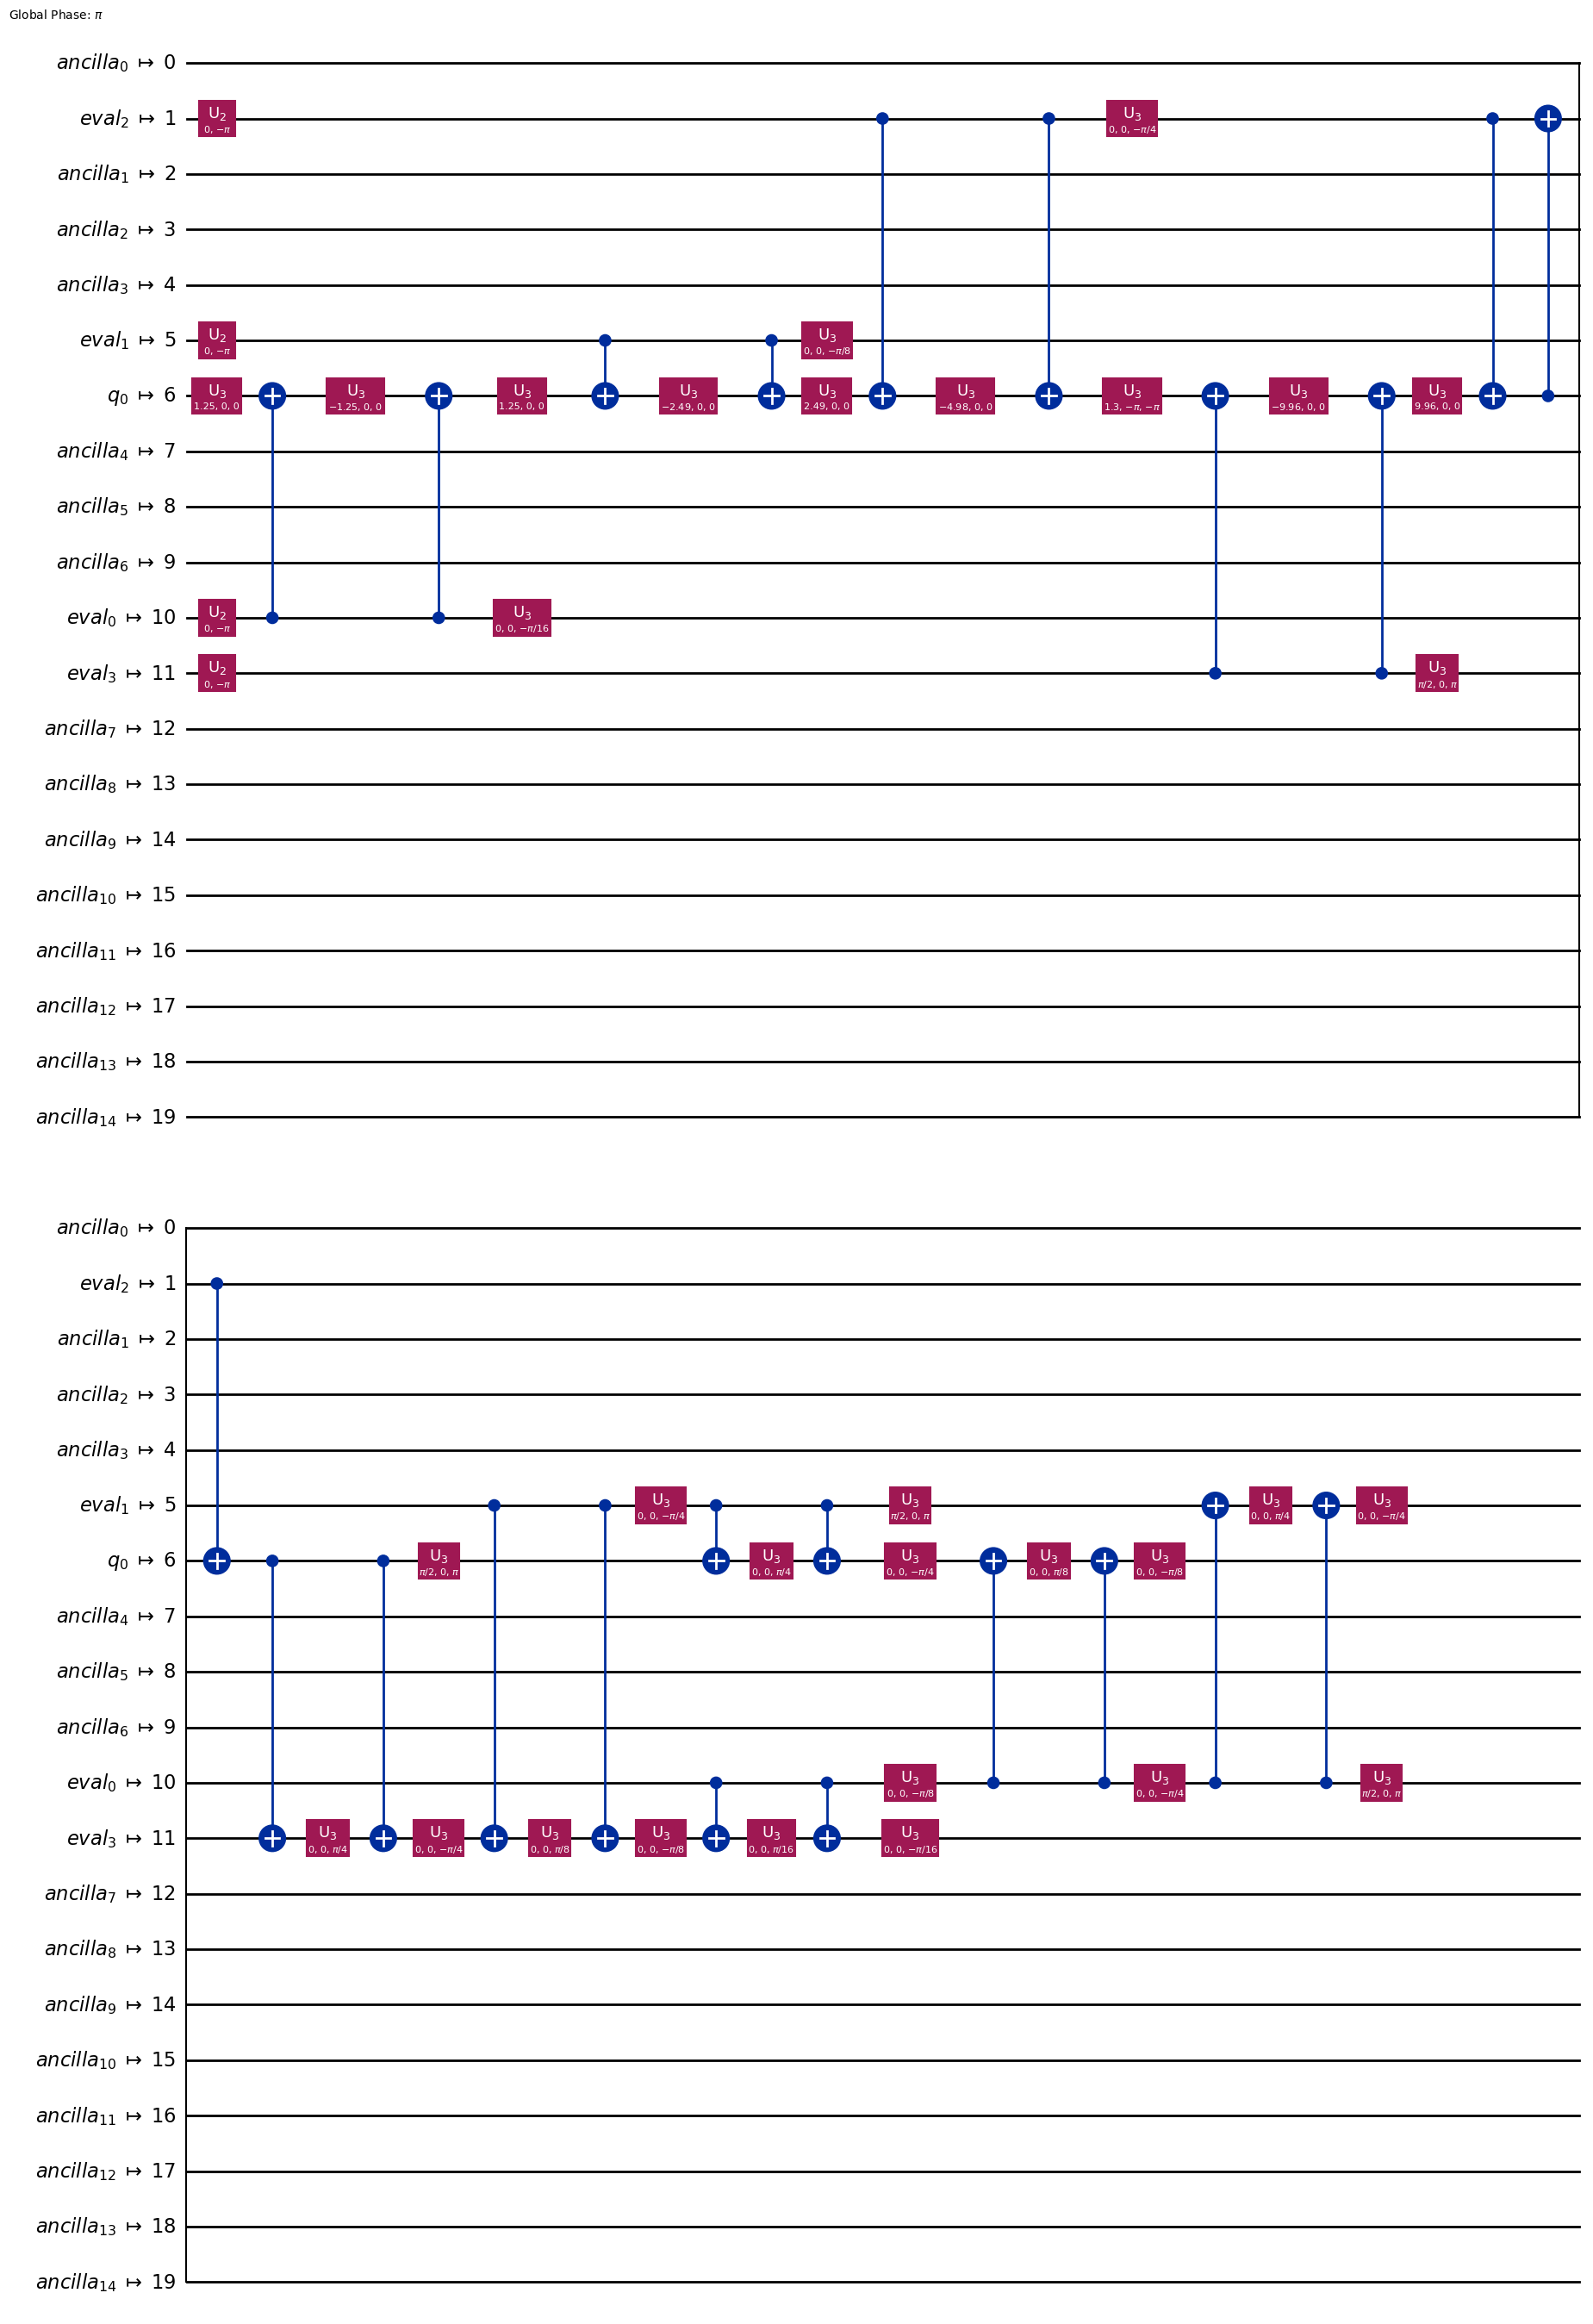

In [161]:
circuit_drawer(transpile(ae.construct_circuit(problem).decompose(reps=8), backend=backend), output='mpl', style="iqp")

In [ ]:
basis_gates = ["h", "ry", "cx",'u']